In [3]:
import earthpy as et
import rioxarray as rxr
import matplotlib.ticker as mticker 
import matplotlib.pyplot as plt
import earthpy.plot as ep
import os

In [3]:
et.data.data_keys

['california-rim-fire',
 'co-flood-extras',
 'cold-springs-fire',
 'cold-springs-landsat-scenes',
 'cold-springs-modis-h4',
 'colorado-flood',
 'cs-test-landsat',
 'cs-test-naip',
 'naip-fire-crop',
 'ndvi-automation',
 'spatial-vector-lidar',
 'twitter-flood',
 'vignette-elevation',
 'vignette-landsat']

In [12]:
os.listdir(xpath)

['discharge', 'downloads', 'precipitation', 'spatial']

In [13]:
os.listdir(os.path.join(xpath, "spatial"))

['boulder-leehill-rd', 'boulder-lidar-points', 'outputs', 'README.md']

In [4]:
xpath = "colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif"

In [5]:
lidar_dtm = rxr.open_rasterio(xpath, masked=True)

In [6]:
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [7]:
# type of rioxarray object
type(lidar_dtm)

xarray.core.dataarray.DataArray

**accessing Numpy Array**

In [10]:
lidar_dtm.values

array([[[      nan,       nan,       nan, ..., 1695.63  , 1695.4199,
         1695.4299],
        [      nan,       nan,       nan, ..., 1695.6   , 1695.5399,
         1695.36  ],
        [      nan,       nan,       nan, ..., 1695.38  , 1695.44  ,
         1695.37  ],
        ...,
        [      nan,       nan,       nan, ..., 1681.45  , 1681.39  ,
         1681.25  ],
        [      nan,       nan,       nan, ..., 1681.72  , 1681.57  ,
         1681.5599],
        [      nan,       nan,       nan, ..., 1681.89  , 1681.8099,
         1681.74  ]]], dtype=float32)

In [11]:
lidar_dtm.shape

(1, 2000, 4000)

In [12]:
lidar_dtm.min()

<xarray.DataArray ()> Size: 4B
np.float32(1676.21)
Coordinates:
    spatial_ref  int64 8B 0

In [13]:
print(lidar_dtm.min())

<xarray.DataArray ()> Size: 4B
np.float32(1676.21)
Coordinates:
    spatial_ref  int64 8B 0


In [14]:
lidar_dtm.max()

<xarray.DataArray ()> Size: 4B
np.float32(2087.43)
Coordinates:
    spatial_ref  int64 8B 0

In [15]:
print(lidar_dtm.max())

<xarray.DataArray ()> Size: 4B
np.float32(2087.43)
Coordinates:
    spatial_ref  int64 8B 0


**resolution of the raster data**

In [19]:
lidar_dtm.rio.resolution()

(1.0, -1.0)

**Plotting data using rioxarray**

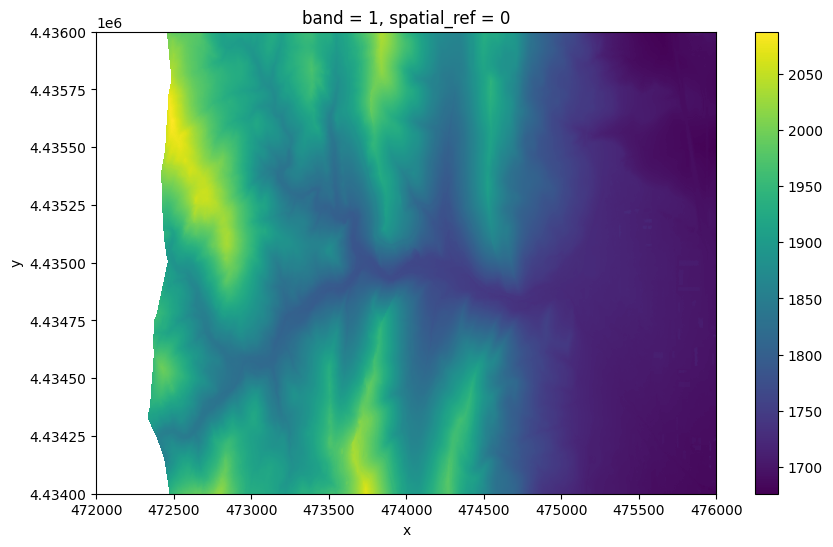

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
lidar_dtm.plot(ax=ax, cmap='viridis')
plt.show()

## Imagery Raster Data

In [4]:
path =  et.data.get_data(url="https://ndownloader.figshare.com/files/23070791", verbose=True)

In [5]:
path

'C:\\Users\\manis\\earth-analytics\\data\\earthpy-downloads\\naip-before-after'

In [6]:
naip_pre_fire_path = os.path.join(path, "pre-fire/crop/m_3910505_nw_13_1_20150919_crop.tif")

In [7]:
naip_pre_fire_path

'C:\\Users\\manis\\earth-analytics\\data\\earthpy-downloads\\naip-before-after\\pre-fire/crop/m_3910505_nw_13_1_20150919_crop.tif'

**opening raster data**

In [8]:
naip_pre_fire = rxr.open_rasterio(naip_pre_fire_path)
naip_pre_fire

<xarray.DataArray (band: 4, y: 2312, x: 4377)> Size: 81MB
[40478496 values with dtype=int16]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 35kB 4.572e+05 4.572e+05 ... 4.615e+05 4.615e+05
  * y            (y) float64 18kB 4.427e+06 4.427e+06 ... 4.425e+06 4.425e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  239
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  32
    STATISTICS_STDDEV:   nan
    _FillValue:          -32768
    scale_factor:        1.0
    add_offset:          0.0

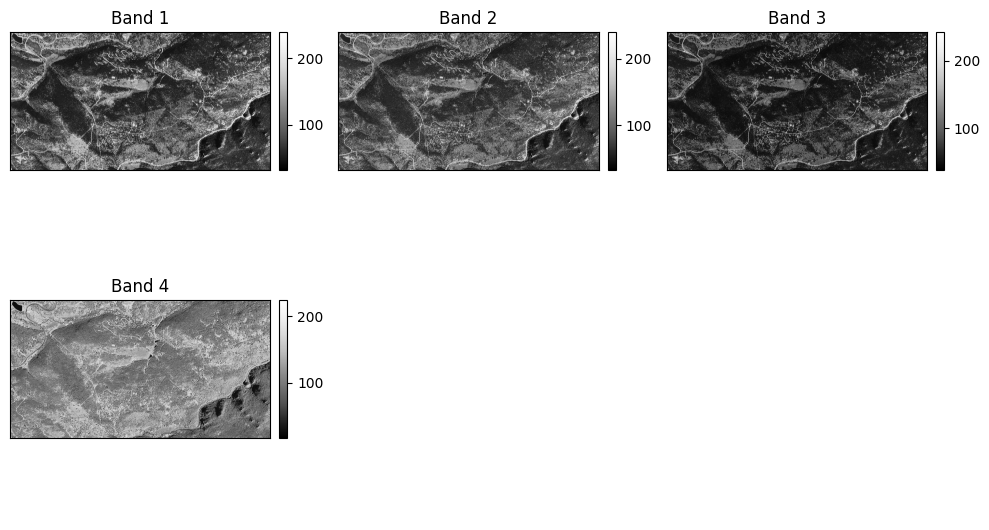

In [9]:
ep.plot_bands(naip_pre_fire, figsize=(10,6))
plt.show()

**plot all bands together**

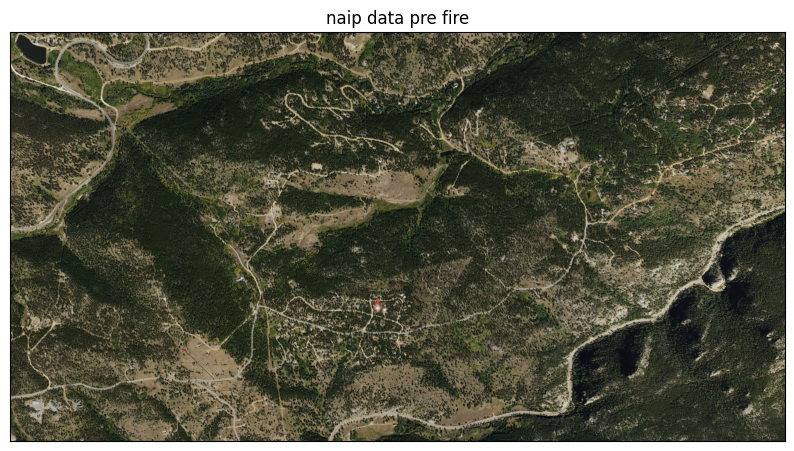

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
ep.plot_rgb(naip_pre_fire.values, title="naip data pre fire", ax=ax)
plt.show()

## Cartopy CRS

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

G:\WorkData\Programming\Python\GIS Data Science\workspace\gis-env\lib\site-packages\cartopy\mpl\geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
G:\WorkData\Programming\Python\GIS Data Science\workspace\gis-env\lib\site-packages\cartopy\mpl\geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the Plate

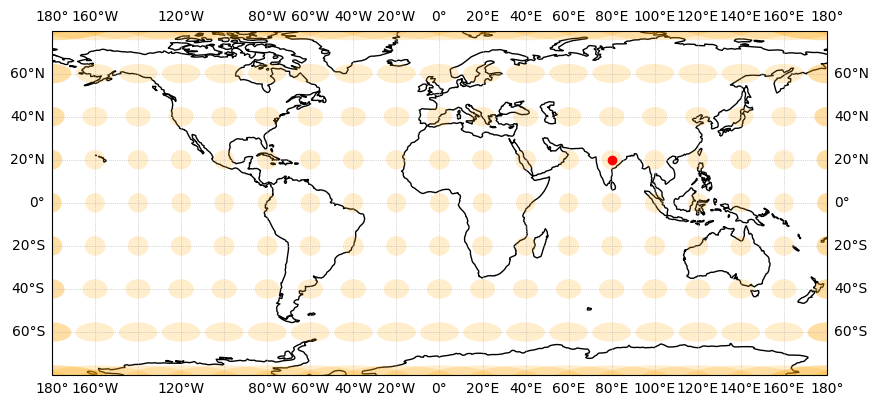

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()},
                      figsize=(10,10)
                      )
ax.coastlines()

longitudes = range(-180,181,20)
latitudes = range(-80,81,20)

gl = ax.gridlines(draw_labels=True, auto_inline=True, alpha=1, lw=0.5, linestyle=":", )
gl.xlocator = mticker.FixedLocator(longitudes)
gl.ylocator = mticker.FixedLocator(latitudes)

ax.tissot(facecolor="orange", alpha=0.2, rad_km=500, lons=longitudes, lats=latitudes)

ax.plot(80, 20, 'ro', transform=ccrs.Geodetic())

ax.axis([-180, 180, -80, 80])

plt.show()